In [73]:
#Import modules
import requests
import json
import pandas as pd
from config import api_key
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np
import math

In [74]:
#URL and api key variables set
url_gold = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=GOLD&interval=5min&apikey=api_key&outputsize=full"
url_oil = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=OIL&interval=5min&apikey=api_key&outputsize=full"
url_btc = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=CNY&apikey=api_key"
url_trix_gold = "https://www.alphavantage.co/query?function=TRIX&symbol=GOLD&interval=daily&time_period=10&series_type=close&apikey=api_key"
url_trix_oil = "https://www.alphavantage.co/query?function=TRIX&symbol=OIL&interval=daily&time_period=10&series_type=close&apikey=api_key"
url_trix_btc = "https://www.alphavantage.co/query?function=TRIX&symbol=BTC&interval=daily&time_period=10&series_type=close&apikey=api_key"
url_sphq = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPHQ&interval=5min&apikey=api_key&outputsize=full"

api_key = "&apikey=" + api_key

In [75]:
#Data pull and pretty print with json
response_sphq = requests.get(url_sphq + api_key).json()
print(json.dumps(response_sphq, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1. Information": "Daily Time Series with Splits and Dividend Events",
        "2. Symbol": "SPHQ",
        "3. Last Refreshed": "2023-02-09 16:00:01",
        "4. Output Size": "Full size",
        "5. Time Zone": "US/Eastern"
    },
    "Time Series (Daily)": {
        "2005-12-06": {
            "1. open": "15.47",
            "2. high": "15.69",
            "3. low": "15.47",
            "4. close": "15.6",
            "5. adjusted close": "12.4527875026143",
            "6. volume": "343700",
            "7. dividend amount": "0.0000",
            "8. split coefficient": "1.0"
        },
        "2005-12-07": {
            "1. open": "15.6",
            "2. high": "15.62",
            "3. low": "15.42",
            "4. close": "15.44",
            "5. adjusted close": "12.3250666051516",
            "6. volume": "342800",
            "7. dividend amount": "0.0000",
            "8. split coefficient": "1.0"
        },
        "2005-12-08": {
           

In [76]:
#Data pull and create dataframe
sphq_data = response_sphq["Time Series (Daily)"]
sphq_df = pd.DataFrame(sphq_data).transpose()

sphq_df

1. open  2. high   3. low 4. close 5. adjusted close 6. volume  \
2023-02-09    47.0    47.06     46.2    46.31             46.31   2416986   
2023-02-08   47.03    47.15    46.52    46.58             46.58    393845   
2023-02-07   46.44    47.34    46.42    47.21             47.21    452798   
2023-02-06   46.54     46.7   46.361    46.53             46.53    318056   
2023-02-03    46.7  47.2225  46.6601    46.78             46.78    412225   
...            ...      ...      ...      ...               ...       ...   
2005-12-12   15.75     15.8    15.59    15.67  12.5086653952542    315300   
2005-12-09   15.59    15.74    15.47    15.57    12.42883983434    295000   
2005-12-08   15.45    15.58   15.439    15.52  12.3889270538829    354100   
2005-12-07    15.6    15.62    15.42    15.44  12.3250666051516    342800   
2005-12-06   15.47    15.69    15.47     15.6  12.4527875026143    343700   

           7. dividend amount 8. split coefficient  
2023-02-09             0.0000                  1.0  
2023-02-08             0.0000                  1.0  
2023-02-07             0.0000                  1.0  
2023-02-06             0.0000                  1.0  
2023-02-03             0.0000                  1.0  
...                       ...                  ...  
2005-12-12             0.0000                  1.0  
2005-12-09             0.0000                  1.0  
2005-12-08             0.0000                  1.0  
2005-12-07             0.0000                  1.0  
2005-12-06             0.0000                  1.0  

[4323 rows x 8 columns]

In [77]:
organized_sphq_df = gold_df[["1. open", "2. high", "3. low", "4. close" , "6. volume"]]
organized_sphq_df

1. open 2. high 3. low 4. close 6. volume
2023-02-08   18.54   18.56  18.11    18.34  11946260
2023-02-07   18.35   18.69  18.19     18.5  15345588
2023-02-06   18.21   18.44  18.11    18.35  15431145
2023-02-03    18.8  18.825   18.2    18.32  25763129
2023-02-02   20.19   20.19  19.17     19.4  20871509
...            ...     ...    ...      ...       ...
1999-11-05   17.56   17.69  17.13    17.19   1510400
1999-11-04   17.69   17.94  17.56    17.69   1963000
1999-11-03   18.19   18.25  17.75    17.88   1454300
1999-11-02   17.81   18.25  17.63    18.25   2075100
1999-11-01    18.0   18.06  17.56    17.81   1678800

[5856 rows x 5 columns]

In [78]:
clean_sphq_df = organized_sphq_df.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low" , "4. close": "close" , "6. volume": "volume"})
clean_sphq_df = clean_sphq_df.astype(float)
clean_sphq_df

open    high    low  close      volume
2023-02-08  18.54  18.560  18.11  18.34  11946260.0
2023-02-07  18.35  18.690  18.19  18.50  15345588.0
2023-02-06  18.21  18.440  18.11  18.35  15431145.0
2023-02-03  18.80  18.825  18.20  18.32  25763129.0
2023-02-02  20.19  20.190  19.17  19.40  20871509.0
...           ...     ...    ...    ...         ...
1999-11-05  17.56  17.690  17.13  17.19   1510400.0
1999-11-04  17.69  17.940  17.56  17.69   1963000.0
1999-11-03  18.19  18.250  17.75  17.88   1454300.0
1999-11-02  17.81  18.250  17.63  18.25   2075100.0
1999-11-01  18.00  18.060  17.56  17.81   1678800.0

[5856 rows x 5 columns]

In [79]:
daily_change_sphq = (100 * (clean_sphq_df["close"] - clean_sphq_df["open"] ) ) / clean_sphq_df["open"]
clean_sphq_df["daily change (%)"] = daily_change_sphq
clean_sphq_df

open    high    low  close      volume  daily change (%)
2023-02-08  18.54  18.560  18.11  18.34  11946260.0         -1.078749
2023-02-07  18.35  18.690  18.19  18.50  15345588.0          0.817439
2023-02-06  18.21  18.440  18.11  18.35  15431145.0          0.768808
2023-02-03  18.80  18.825  18.20  18.32  25763129.0         -2.553191
2023-02-02  20.19  20.190  19.17  19.40  20871509.0         -3.912828
...           ...     ...    ...    ...         ...               ...
1999-11-05  17.56  17.690  17.13  17.19   1510400.0         -2.107062
1999-11-04  17.69  17.940  17.56  17.69   1963000.0          0.000000
1999-11-03  18.19  18.250  17.75  17.88   1454300.0         -1.704233
1999-11-02  17.81  18.250  17.63  18.25   2075100.0          2.470522
1999-11-01  18.00  18.060  17.56  17.81   1678800.0         -1.055556

[5856 rows x 6 columns]

In [80]:
clean_sphq_df["symbol"] = "GOLD"
final_sphq_df = clean_sphq_df[["symbol", "open", "high", "low", "close","daily change (%)"]]
final_sphq_df

symbol   open    high    low  close  daily change (%)
2023-02-08   GOLD  18.54  18.560  18.11  18.34         -1.078749
2023-02-07   GOLD  18.35  18.690  18.19  18.50          0.817439
2023-02-06   GOLD  18.21  18.440  18.11  18.35          0.768808
2023-02-03   GOLD  18.80  18.825  18.20  18.32         -2.553191
2023-02-02   GOLD  20.19  20.190  19.17  19.40         -3.912828
...           ...    ...     ...    ...    ...               ...
1999-11-05   GOLD  17.56  17.690  17.13  17.19         -2.107062
1999-11-04   GOLD  17.69  17.940  17.56  17.69          0.000000
1999-11-03   GOLD  18.19  18.250  17.75  17.88         -1.704233
1999-11-02   GOLD  17.81  18.250  17.63  18.25          2.470522
1999-11-01   GOLD  18.00  18.060  17.56  17.81         -1.055556

[5856 rows x 6 columns]

In [7]:
#API data request for gold data
response_gold = requests.get(url_gold + api_key).json()
print(json.dumps(response_gold, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1. Information": "Daily Time Series with Splits and Dividend Events",
        "2. Symbol": "GOLD",
        "3. Last Refreshed": "2023-02-08",
        "4. Output Size": "Full size",
        "5. Time Zone": "US/Eastern"
    },
    "Time Series (Daily)": {
        "1999-11-01": {
            "1. open": "18.0",
            "2. high": "18.06",
            "3. low": "17.56",
            "4. close": "17.81",
            "5. adjusted close": "13.1072006096843",
            "6. volume": "1678800",
            "7. dividend amount": "0.0000",
            "8. split coefficient": "1.0"
        },
        "1999-11-02": {
            "1. open": "17.81",
            "2. high": "18.25",
            "3. low": "17.63",
            "4. close": "18.25",
            "5. adjusted close": "13.4310169077338",
            "6. volume": "2075100",
            "7. dividend amount": "0.0000",
            "8. split coefficient": "1.0"
        },
        "1999-11-03": {
            "1. o

In [8]:
#Data pull request for gold data "Time Series (Daily)"
gold_data = response_gold["Time Series (Daily)"]
gold_data

{'2023-02-08': {'1. open': '18.54',
  '2. high': '18.56',
  '3. low': '18.11',
  '4. close': '18.34',
  '5. adjusted close': '18.34',
  '6. volume': '11946260',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2023-02-07': {'1. open': '18.35',
  '2. high': '18.69',
  '3. low': '18.19',
  '4. close': '18.5',
  '5. adjusted close': '18.5',
  '6. volume': '15345588',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2023-02-06': {'1. open': '18.21',
  '2. high': '18.44',
  '3. low': '18.11',
  '4. close': '18.35',
  '5. adjusted close': '18.35',
  '6. volume': '15431145',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2023-02-03': {'1. open': '18.8',
  '2. high': '18.825',
  '3. low': '18.2',
  '4. close': '18.32',
  '5. adjusted close': '18.32',
  '6. volume': '25763129',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0'},
 '2023-02-02': {'1. open': '20.19',
  '2. high': '20.19',
  '3. low': '19.17',
  '4. cl

In [9]:
#Switch columns and row data
gold_df = pd.DataFrame(gold_data).transpose()

gold_df

1. open 2. high 3. low 4. close 5. adjusted close 6. volume  \
2023-02-08   18.54   18.56  18.11    18.34             18.34  11946260   
2023-02-07   18.35   18.69  18.19     18.5              18.5  15345588   
2023-02-06   18.21   18.44  18.11    18.35             18.35  15431145   
2023-02-03    18.8  18.825   18.2    18.32             18.32  25763129   
2023-02-02   20.19   20.19  19.17     19.4              19.4  20871509   
...            ...     ...    ...      ...               ...       ...   
1999-11-05   17.56   17.69  17.13    17.19  12.6509140078873   1510400   
1999-11-04   17.69   17.94  17.56    17.69  13.0188870738526   1963000   
1999-11-03   18.19   18.25  17.75    17.88  13.1587168389195   1454300   
1999-11-02   17.81   18.25  17.63    18.25  13.4310169077338   2075100   
1999-11-01    18.0   18.06  17.56    17.81  13.1072006096843   1678800   

           7. dividend amount 8. split coefficient  
2023-02-08             0.0000                  1.0  
2023-02-07             0.0000                  1.0  
2023-02-06             0.0000                  1.0  
2023-02-03             0.0000                  1.0  
2023-02-02             0.0000                  1.0  
...                       ...                  ...  
1999-11-05             0.0000                  1.0  
1999-11-04             0.0000                  1.0  
1999-11-03             0.0000                  1.0  
1999-11-02             0.0000                  1.0  
1999-11-01             0.0000                  1.0  

[5856 rows x 8 columns]

In [10]:
#Reorganize columns in gold dataframe
organized_gold_df = gold_df[["1. open", "2. high", "3. low", "4. close" , "6. volume"]]
organized_gold_df

1. open 2. high 3. low 4. close 6. volume
2023-02-08   18.54   18.56  18.11    18.34  11946260
2023-02-07   18.35   18.69  18.19     18.5  15345588
2023-02-06   18.21   18.44  18.11    18.35  15431145
2023-02-03    18.8  18.825   18.2    18.32  25763129
2023-02-02   20.19   20.19  19.17     19.4  20871509
...            ...     ...    ...      ...       ...
1999-11-05   17.56   17.69  17.13    17.19   1510400
1999-11-04   17.69   17.94  17.56    17.69   1963000
1999-11-03   18.19   18.25  17.75    17.88   1454300
1999-11-02   17.81   18.25  17.63    18.25   2075100
1999-11-01    18.0   18.06  17.56    17.81   1678800

[5856 rows x 5 columns]

In [53]:
#Relabeled columns for gold dataframe
clean_gold_df = organized_gold_df.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low" , "4. close": "close" , "6. volume": "volume"})
clean_gold_df = clean_gold_df.astype(float)
clean_gold_df

open    high    low  close      volume
2023-02-08  18.54  18.560  18.11  18.34  11946260.0
2023-02-07  18.35  18.690  18.19  18.50  15345588.0
2023-02-06  18.21  18.440  18.11  18.35  15431145.0
2023-02-03  18.80  18.825  18.20  18.32  25763129.0
2023-02-02  20.19  20.190  19.17  19.40  20871509.0
...           ...     ...    ...    ...         ...
1999-11-05  17.56  17.690  17.13  17.19   1510400.0
1999-11-04  17.69  17.940  17.56  17.69   1963000.0
1999-11-03  18.19  18.250  17.75  17.88   1454300.0
1999-11-02  17.81  18.250  17.63  18.25   2075100.0
1999-11-01  18.00  18.060  17.56  17.81   1678800.0

[5856 rows x 5 columns]

In [56]:
daily_change_gold = (100 * (clean_gold_df["close"] - clean_gold_df["open"] ) ) / clean_gold_df["open"]
clean_gold_df["daily change (%)"] = daily_change_gold
clean_gold_df

open    high    low  close      volume symbol  daily change (%)
2023-02-08  18.54  18.560  18.11  18.34  11946260.0   GOLD         -1.078749
2023-02-07  18.35  18.690  18.19  18.50  15345588.0   GOLD          0.817439
2023-02-06  18.21  18.440  18.11  18.35  15431145.0   GOLD          0.768808
2023-02-03  18.80  18.825  18.20  18.32  25763129.0   GOLD         -2.553191
2023-02-02  20.19  20.190  19.17  19.40  20871509.0   GOLD         -3.912828
...           ...     ...    ...    ...         ...    ...               ...
1999-11-05  17.56  17.690  17.13  17.19   1510400.0   GOLD         -2.107062
1999-11-04  17.69  17.940  17.56  17.69   1963000.0   GOLD          0.000000
1999-11-03  18.19  18.250  17.75  17.88   1454300.0   GOLD         -1.704233
1999-11-02  17.81  18.250  17.63  18.25   2075100.0   GOLD          2.470522
1999-11-01  18.00  18.060  17.56  17.81   1678800.0   GOLD         -1.055556

[5856 rows x 7 columns]

In [57]:
#Final cleaned dataframe for gold
clean_gold_df["symbol"] = "GOLD"
final_gold_df = clean_gold_df[["symbol", "open", "high", "low", "close","daily change (%)"]]
final_gold_df

symbol   open    high    low  close  daily change (%)
2023-02-08   GOLD  18.54  18.560  18.11  18.34         -1.078749
2023-02-07   GOLD  18.35  18.690  18.19  18.50          0.817439
2023-02-06   GOLD  18.21  18.440  18.11  18.35          0.768808
2023-02-03   GOLD  18.80  18.825  18.20  18.32         -2.553191
2023-02-02   GOLD  20.19  20.190  19.17  19.40         -3.912828
...           ...    ...     ...    ...    ...               ...
1999-11-05   GOLD  17.56  17.690  17.13  17.19         -2.107062
1999-11-04   GOLD  17.69  17.940  17.56  17.69          0.000000
1999-11-03   GOLD  18.19  18.250  17.75  17.88         -1.704233
1999-11-02   GOLD  17.81  18.250  17.63  18.25          2.470522
1999-11-01   GOLD  18.00  18.060  17.56  17.81         -1.055556

[5856 rows x 6 columns]

In [13]:
#API request for oil data
response_oil = requests.get(url_oil + api_key).json()
print(json.dumps(response_oil, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1. Information": "Daily Time Series with Splits and Dividend Events",
        "2. Symbol": "OIL",
        "3. Last Refreshed": "2023-02-08",
        "4. Output Size": "Full size",
        "5. Time Zone": "US/Eastern"
    },
    "Time Series (Daily)": {
        "2011-04-21": {
            "1. open": "49.94",
            "2. high": "50.35",
            "3. low": "49.9",
            "4. close": "50.35",
            "5. adjusted close": "50.35",
            "6. volume": "10478",
            "7. dividend amount": "0.0000",
            "8. split coefficient": "1.0"
        },
        "2011-04-25": {
            "1. open": "50.57",
            "2. high": "50.57",
            "3. low": "49.91",
            "4. close": "50.05",
            "5. adjusted close": "50.05",
            "6. volume": "14900",
            "7. dividend amount": "0.0000",
            "8. split coefficient": "1.0"
        },
        "2011-04-26": {
            "1. open": "50.18",
            

In [14]:
#Format data into dataframe, organize columns and rename columns
oil_data = response_oil["Time Series (Daily)"]
oil_df = pd.DataFrame(oil_data).transpose()
organized_oil_df = oil_df[["1. open", "2. high", "3. low", "4. close" , "6. volume"]]
clean_oil_df = organized_oil_df.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low" , "4. close": "close" , "6. volume": "volume"})
clean_oil_df = clean_oil_df.astype(float)
clean_oil_df

open     high    low  close   volume
2023-02-08  29.75  29.8600  29.37  29.79  17969.0
2023-02-07  28.52  29.5000  28.52  29.50  46772.0
2023-02-06  28.29  28.4700  27.63  28.47  47355.0
2023-02-03  28.94  29.6500  27.95  27.95  82584.0
2023-02-02  29.06  29.2882  28.70  28.85  80273.0
...           ...      ...    ...    ...      ...
2011-04-28  50.78  51.1600  50.17  50.70  44765.0
2011-04-27  50.35  50.8500  49.80  50.81  35200.0
2011-04-26  50.18  50.4300  50.10  50.30  15000.0
2011-04-25  50.57  50.5700  49.91  50.05  14900.0
2011-04-21  49.94  50.3500  49.90  50.35  10478.0

[2970 rows x 5 columns]

In [15]:
daily_change_oil = (100 * (clean_oil_df["close"] - clean_oil_df["open"] ) ) / clean_oil_df["open"]
clean_oil_df["daily change (%)"] = daily_change_oil
clean_oil_df

open     high    low  close   volume  daily change (%)
2023-02-08  29.75  29.8600  29.37  29.79  17969.0          0.134454
2023-02-07  28.52  29.5000  28.52  29.50  46772.0          3.436185
2023-02-06  28.29  28.4700  27.63  28.47  47355.0          0.636267
2023-02-03  28.94  29.6500  27.95  27.95  82584.0         -3.420871
2023-02-02  29.06  29.2882  28.70  28.85  80273.0         -0.722643
...           ...      ...    ...    ...      ...               ...
2011-04-28  50.78  51.1600  50.17  50.70  44765.0         -0.157542
2011-04-27  50.35  50.8500  49.80  50.81  35200.0          0.913605
2011-04-26  50.18  50.4300  50.10  50.30  15000.0          0.239139
2011-04-25  50.57  50.5700  49.91  50.05  14900.0         -1.028278
2011-04-21  49.94  50.3500  49.90  50.35  10478.0          0.820985

[2970 rows x 6 columns]

In [16]:
#Final cleaned dataframe for oil
clean_oil_df["symbol"] = "OIL"
final_oil_df = clean_oil_df[["symbol", "open", "high", "low", "close", "daily change (%)"]]
final_oil_df

symbol   open     high    low  close  daily change (%)
2023-02-08    OIL  29.75  29.8600  29.37  29.79          0.134454
2023-02-07    OIL  28.52  29.5000  28.52  29.50          3.436185
2023-02-06    OIL  28.29  28.4700  27.63  28.47          0.636267
2023-02-03    OIL  28.94  29.6500  27.95  27.95         -3.420871
2023-02-02    OIL  29.06  29.2882  28.70  28.85         -0.722643
...           ...    ...      ...    ...    ...               ...
2011-04-28    OIL  50.78  51.1600  50.17  50.70         -0.157542
2011-04-27    OIL  50.35  50.8500  49.80  50.81          0.913605
2011-04-26    OIL  50.18  50.4300  50.10  50.30          0.239139
2011-04-25    OIL  50.57  50.5700  49.91  50.05         -1.028278
2011-04-21    OIL  49.94  50.3500  49.90  50.35          0.820985

[2970 rows x 6 columns]

In [17]:
#Check for null values in oil dataframe
final_oil_df.isnull().sum()

symbol              0
open                0
high                0
low                 0
close               0
daily change (%)    0
dtype: int64

In [86]:
#API request for bitcoin data
response_btc = requests.get(url_btc + api_key).json()
print(json.dumps(response_btc, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1. Information": "Daily Prices and Volumes for Digital Currency",
        "2. Digital Currency Code": "BTC",
        "3. Digital Currency Name": "Bitcoin",
        "4. Market Code": "CNY",
        "5. Market Name": "Chinese Yuan",
        "6. Last Refreshed": "2023-02-09 00:00:00",
        "7. Time Zone": "UTC"
    },
    "Time Series (Digital Currency Daily)": {
        "2020-05-16": {
            "1a. open (CNY)": "63269.34234000",
            "1b. open (USD)": "9315.96000000",
            "2a. high (CNY)": "65116.90200000",
            "2b. high (USD)": "9588.00000000",
            "3a. low (CNY)": "62617.63000000",
            "3b. low (USD)": "9220.00000000",
            "4a. close (CNY)": "63712.89520500",
            "4b. close (USD)": "9381.27000000",
            "5. volume": "59587.62786200",
            "6. market cap (USD)": "59587.62786200"
        },
        "2020-05-17": {
            "1a. open (CNY)": "63709.77111500",
            "1b. open 

In [87]:
#Build data into dataframe for bitcoin
btc_data = response_btc["Time Series (Digital Currency Daily)"]
btc_df = pd.DataFrame(btc_data).transpose()
organized_btc_df = btc_df[["1b. open (USD)", "2b. high (USD)", "3b. low (USD)", "4b. close (USD)", "5. volume"]]
clean_btc_df = organized_btc_df.rename(columns={"1b. open (USD)": "open", "2b. high (USD)": "high", "3b. low (USD)": "low" , "4b. close (USD)": "close" , "5. volume": "volume"})
clean_btc_df

open            high             low           close  \
2023-02-09  22961.85000000  23011.39000000  22926.35000000  22968.10000000   
2023-02-08  23242.42000000  23452.00000000  22665.85000000  22963.00000000   
2023-02-07  22762.52000000  23350.25000000  22745.78000000  23240.46000000   
2023-02-06  22932.91000000  23158.25000000  22628.13000000  22762.52000000   
2023-02-05  23327.66000000  23433.33000000  22743.00000000  22932.91000000   
...                    ...             ...             ...             ...   
2020-05-20   9775.13000000   9842.00000000   9326.00000000   9511.43000000   
2020-05-19   9733.93000000   9897.21000000   9474.00000000   9775.53000000   
2020-05-18   9681.11000000   9950.00000000   9464.23000000   9733.93000000   
2020-05-17   9380.81000000   9888.00000000   9322.10000000   9680.04000000   
2020-05-16   9315.96000000   9588.00000000   9220.00000000   9381.27000000   

                     volume  
2023-02-09   14695.73476000  
2023-02-08  280056.30717000  
2023-02-07  308006.72482000  
2023-02-06  265371.60690000  
2023-02-05  209251.33917000  
...                     ...  
2020-05-20   74923.73809000  
2020-05-19   78539.76045400  
2020-05-18   82006.60358300  
2020-05-17   68647.76432300  
2020-05-16   59587.62786200  

[1000 rows x 5 columns]

In [88]:
#Adding symbol column ad fill with "BTC"
clean_btc_df["symbol"] = "BTC"
clean_btc_df

open            high             low           close  \
2023-02-09  22961.85000000  23011.39000000  22926.35000000  22968.10000000   
2023-02-08  23242.42000000  23452.00000000  22665.85000000  22963.00000000   
2023-02-07  22762.52000000  23350.25000000  22745.78000000  23240.46000000   
2023-02-06  22932.91000000  23158.25000000  22628.13000000  22762.52000000   
2023-02-05  23327.66000000  23433.33000000  22743.00000000  22932.91000000   
...                    ...             ...             ...             ...   
2020-05-20   9775.13000000   9842.00000000   9326.00000000   9511.43000000   
2020-05-19   9733.93000000   9897.21000000   9474.00000000   9775.53000000   
2020-05-18   9681.11000000   9950.00000000   9464.23000000   9733.93000000   
2020-05-17   9380.81000000   9888.00000000   9322.10000000   9680.04000000   
2020-05-16   9315.96000000   9588.00000000   9220.00000000   9381.27000000   

                     volume symbol  
2023-02-09   14695.73476000    BTC  
2023-02-08  280056.30717000    BTC  
2023-02-07  308006.72482000    BTC  
2023-02-06  265371.60690000    BTC  
2023-02-05  209251.33917000    BTC  
...                     ...    ...  
2020-05-20   74923.73809000    BTC  
2020-05-19   78539.76045400    BTC  
2020-05-18   82006.60358300    BTC  
2020-05-17   68647.76432300    BTC  
2020-05-16   59587.62786200    BTC  

[1000 rows x 6 columns]

In [89]:
#Final cleaned dataframe for bitcoin from API 
final_btc_df = clean_btc_df[["symbol", "open", "high", "low", "close"]]
new_final = final_btc_df.reset_index()
new_final= new_final.rename(columns={"index": "date"})
new_final

date symbol            open            high             low  \
0    2023-02-09    BTC  22961.85000000  23011.39000000  22926.35000000   
1    2023-02-08    BTC  23242.42000000  23452.00000000  22665.85000000   
2    2023-02-07    BTC  22762.52000000  23350.25000000  22745.78000000   
3    2023-02-06    BTC  22932.91000000  23158.25000000  22628.13000000   
4    2023-02-05    BTC  23327.66000000  23433.33000000  22743.00000000   
..          ...    ...             ...             ...             ...   
995  2020-05-20    BTC   9775.13000000   9842.00000000   9326.00000000   
996  2020-05-19    BTC   9733.93000000   9897.21000000   9474.00000000   
997  2020-05-18    BTC   9681.11000000   9950.00000000   9464.23000000   
998  2020-05-17    BTC   9380.81000000   9888.00000000   9322.10000000   
999  2020-05-16    BTC   9315.96000000   9588.00000000   9220.00000000   

              close  
0    22968.10000000  
1    22963.00000000  
2    23240.46000000  
3    22762.52000000  
4    22932.91000000  
..              ...  
995   9511.43000000  
996   9775.53000000  
997   9733.93000000  
998   9680.04000000  
999   9381.27000000  

[1000 rows x 6 columns]

In [90]:
#Path for bitcoin source file from Kaggle
file = "Resources/bitcoin_raw.csv"

In [91]:
#Read file path for CSV and display dataframe
btc_orig_df = pd.read_csv(file)
btc_orig_df.set_index("Date")

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2020-09-07      BTC         10207.605003    10174.863432    10355.652495   
2020-09-08      BTC         10381.776107    10265.742989    10383.119236   
2020-09-09      BTC         10043.196441    10381.676816    10444.171125   
2020-09-10      BTC         10268.460916    10136.560835    10352.415189   
2020-09-11      BTC         10341.015984    10230.635528    10483.561208   

            24h Low (USD)  
Date                       
2013-10-01     122.563490  
2013-10-02     123.633830  
2013-10-03      83.328330  
2013-10-04     107.058160  
2013-10-05     118.005660  
...                   ...  
2020-09-07   10014.277661  
2020-09-08    9891.734243  
2020-09-09    9868.937984  
2020-09-10    9989.510556  
2020-09-11   10224.037393  

[2527 rows x 5 columns]

In [92]:
#Rename columns
organized_btc_orig = btc_orig_df[["Date", "Currency","24h Open (USD)","24h High (USD)","24h Low (USD)", "Closing Price (USD)"]]
clean_btc_orig = organized_btc_orig.rename(columns={"Date": "date","Currency": "symbol","24h Open (USD)": "open","24h High (USD)": "high","24h Low (USD)": "low", "Closing Price (USD)": "close"})
clean_btc_orig.set_index("date")

symbol          open          high           low         close
date                                                                     
2013-10-01    BTC    124.304660    124.751660    122.563490    123.654990
2013-10-02    BTC    123.654990    125.758500    123.633830    125.455000
2013-10-03    BTC    125.455000    125.665660     83.328330    108.584830
2013-10-04    BTC    108.584830    118.675000    107.058160    118.674660
2013-10-05    BTC    118.674660    121.936330    118.005660    121.338660
...           ...           ...           ...           ...           ...
2020-09-07    BTC  10174.863432  10355.652495  10014.277661  10207.605003
2020-09-08    BTC  10265.742989  10383.119236   9891.734243  10381.776107
2020-09-09    BTC  10381.676816  10444.171125   9868.937984  10043.196441
2020-09-10    BTC  10136.560835  10352.415189   9989.510556  10268.460916
2020-09-11    BTC  10230.635528  10483.561208  10224.037393  10341.015984

[2527 rows x 5 columns]

In [126]:
#Combine all bitcoin databases together
join_btc = pd.concat([new_final, clean_btc_orig], ignore_index=False) 
final_join_btc = join_btc.set_index("date")
#final_join_btc = final_join_btc.astype(float)
final_join_btc.sort_values('date')

symbol            open            high             low  \
date                                                                
2013-10-01    BTC       124.30466       124.75166       122.56349   
2013-10-02    BTC       123.65499        125.7585       123.63383   
2013-10-03    BTC         125.455       125.66566        83.32833   
2013-10-04    BTC       108.58483         118.675       107.05816   
2013-10-05    BTC       118.67466       121.93633       118.00566   
...           ...             ...             ...             ...   
2023-02-05    BTC  23327.66000000  23433.33000000  22743.00000000   
2023-02-06    BTC  22932.91000000  23158.25000000  22628.13000000   
2023-02-07    BTC  22762.52000000  23350.25000000  22745.78000000   
2023-02-08    BTC  23242.42000000  23452.00000000  22665.85000000   
2023-02-09    BTC  22961.85000000  23011.39000000  22926.35000000   

                     close  
date                        
2013-10-01       123.65499  
2013-10-02         125.455  
2013-10-03       108.58483  
2013-10-04       118.67466  
2013-10-05       121.33866  
...                    ...  
2023-02-05  22932.91000000  
2023-02-06  22762.52000000  
2023-02-07  23240.46000000  
2023-02-08  22963.00000000  
2023-02-09  22968.10000000  

[3527 rows x 5 columns]

In [29]:
#Request trix data for gold and print
response_trix_gold = requests.get(url_trix_gold + api_key).json()
print(json.dumps(response_trix_gold, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1: Symbol": "GOLD",
        "2: Indicator": "1-day Rate-Of-Change (ROC) of a Triple Smooth EMA (TRIX)",
        "3: Last Refreshed": "2023-02-08",
        "4: Interval": "daily",
        "5: Time Period": 10,
        "6: Series Type": "close",
        "7: Time Zone": "US/Eastern Time"
    },
    "Technical Analysis: TRIX": {
        "1999-12-10": {
            "TRIX": "-0.0576"
        },
        "1999-12-13": {
            "TRIX": "-0.0669"
        },
        "1999-12-14": {
            "TRIX": "-0.0890"
        },
        "1999-12-15": {
            "TRIX": "-0.0987"
        },
        "1999-12-16": {
            "TRIX": "-0.0983"
        },
        "1999-12-17": {
            "TRIX": "-0.0770"
        },
        "1999-12-20": {
            "TRIX": "-0.0603"
        },
        "1999-12-21": {
            "TRIX": "-0.0325"
        },
        "1999-12-22": {
            "TRIX": "-0.0092"
        },
        "1999-12-23": {
            "TRIX": "0.0096"
     

In [30]:
#Build dataframe for gold TRIX and add column labeled "symbol" adding gold in each row
trix_data_gold = response_trix_gold["Technical Analysis: TRIX"]
trix_gold_df = pd.DataFrame(trix_data_gold).transpose()
trix_gold_df["symbol"] = "GOLD"
trix_gold_df

TRIX symbol
2023-02-08   0.0958   GOLD
2023-02-07   0.1780   GOLD
2023-02-06   0.2619   GOLD
2023-02-03   0.3466   GOLD
2023-02-02   0.4130   GOLD
...             ...    ...
1999-12-16  -0.0983   GOLD
1999-12-15  -0.0987   GOLD
1999-12-14  -0.0890   GOLD
1999-12-13  -0.0669   GOLD
1999-12-10  -0.0576   GOLD

[5828 rows x 2 columns]

In [31]:
#Request trix data for gold and print
response_trix_oil = requests.get(url_trix_oil + api_key).json()
print(json.dumps(response_trix_oil, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1: Symbol": "OIL",
        "2: Indicator": "1-day Rate-Of-Change (ROC) of a Triple Smooth EMA (TRIX)",
        "3: Last Refreshed": "2023-02-08",
        "4: Interval": "daily",
        "5: Time Period": 10,
        "6: Series Type": "close",
        "7: Time Zone": "US/Eastern Time"
    },
    "Technical Analysis: TRIX": {
        "2011-06-02": {
            "TRIX": "-0.2583"
        },
        "2011-06-03": {
            "TRIX": "-0.2188"
        },
        "2011-06-06": {
            "TRIX": "-0.1963"
        },
        "2011-06-07": {
            "TRIX": "-0.1867"
        },
        "2011-06-08": {
            "TRIX": "-0.1694"
        },
        "2011-06-09": {
            "TRIX": "-0.1454"
        },
        "2011-06-10": {
            "TRIX": "-0.1191"
        },
        "2011-06-13": {
            "TRIX": "-0.1188"
        },
        "2011-06-14": {
            "TRIX": "-0.1216"
        },
        "2011-06-15": {
            "TRIX": "-0.1447"
     

In [32]:
#Build dataframe for gold TRIX and add column labeled "symbol" adding gold in each row
trix_data_oil = response_trix_oil["Technical Analysis: TRIX"]
trix_oil_df = pd.DataFrame(trix_data_oil).transpose()
trix_oil_df["symbol"] = "OIL"
trix_oil_df

TRIX symbol
2023-02-08  -0.1075    OIL
2023-02-07  -0.0885    OIL
2023-02-06  -0.0423    OIL
2023-02-03   0.0347    OIL
2023-02-02   0.1175    OIL
...             ...    ...
2011-06-08  -0.1694    OIL
2011-06-07  -0.1867    OIL
2011-06-06  -0.1963    OIL
2011-06-03  -0.2188    OIL
2011-06-02  -0.2583    OIL

[2942 rows x 2 columns]

In [33]:
response_trix_btc = requests.get(url_trix_btc + api_key).json()
print(json.dumps(response_trix_btc, indent=4, sort_keys=True))

{}


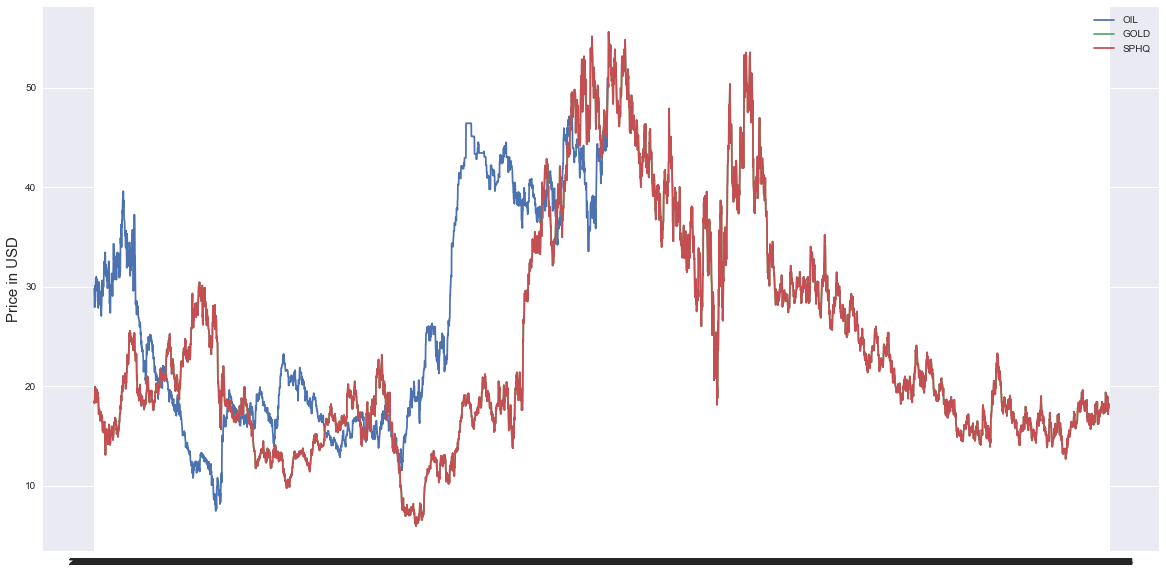

In [122]:
x = final_oil_df.index
y = final_oil_df["close"]

x2 = final_gold_df.index
y2 = final_gold_df["close"]

x3 = final_sphq_df.index
y3 = final_sphq_df["close"]





plt.figure(figsize=(20,10))

plt.plot(x, y, label='OIL')
plt.plot(x2, y2, label='GOLD')
plt.plot(x3, y3, label='SPHQ')



plt.legend(loc='upper right')

plt.ylabel("Price in USD", fontsize=15)


plt.show()


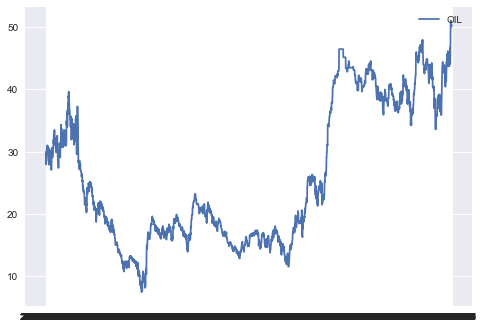

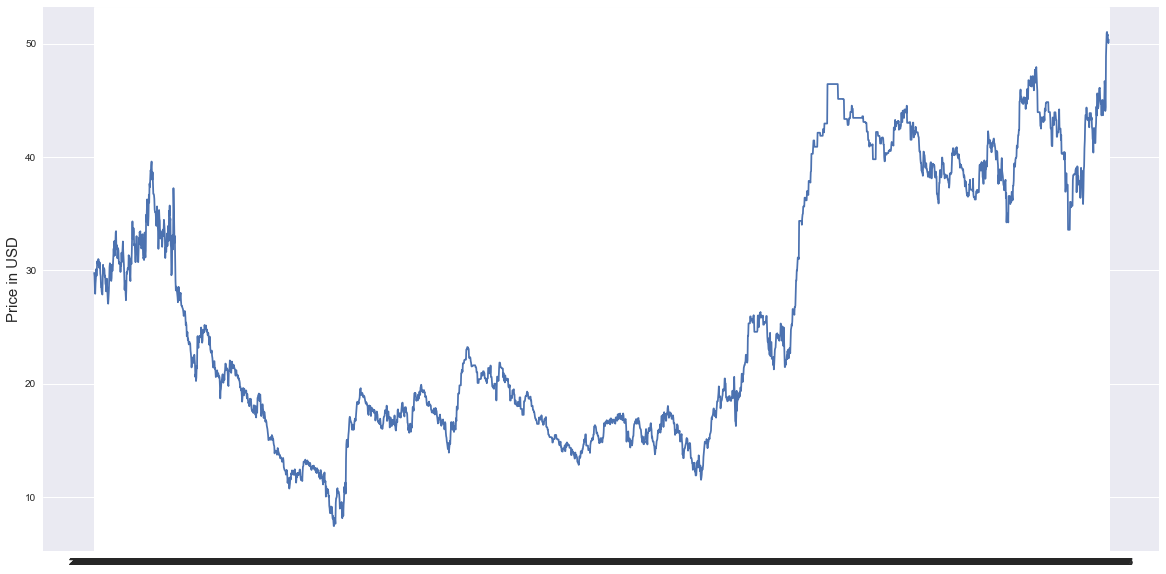

In [110]:
x = final_oil_df.index
y = final_oil_df["close"]
plt.plot(x, y, label='OIL')

plt.legend(loc='upper right')
plt.figure(figsize=(20,10))
plt.ylabel("Price in USD", fontsize=15)
plt.plot(x, y, label='OIL')
plt.show()

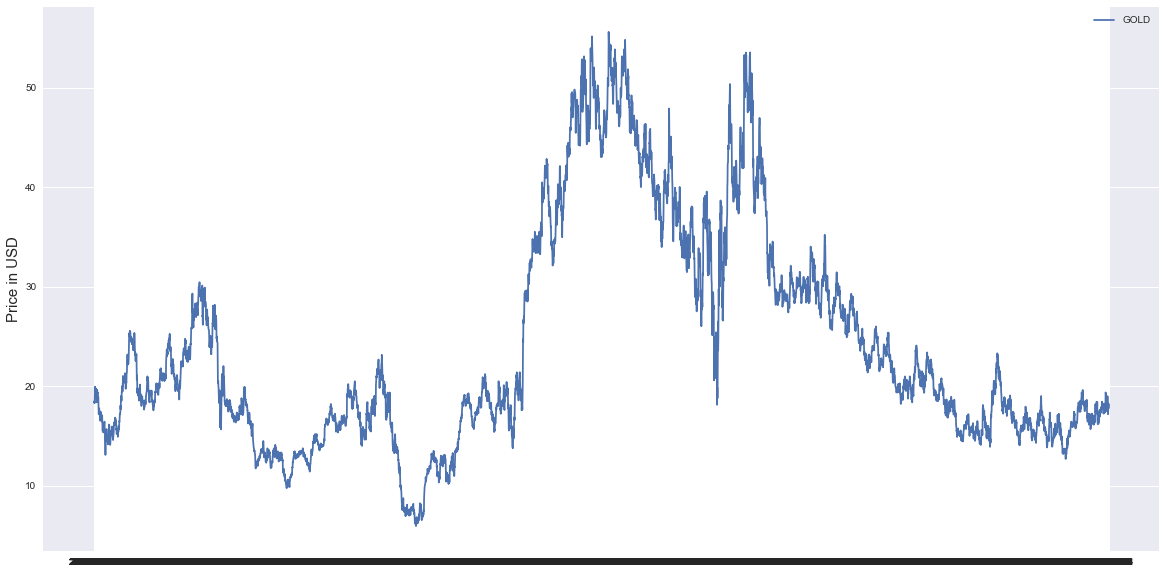

In [111]:
x2 = final_gold_df.index
y2 = final_gold_df["close"]
plt.figure(figsize=(20,10))
plt.plot(x2, y2, label='GOLD')
plt.legend(loc='upper right')
plt.ylabel("Price in USD", fontsize=15)
plt.show()

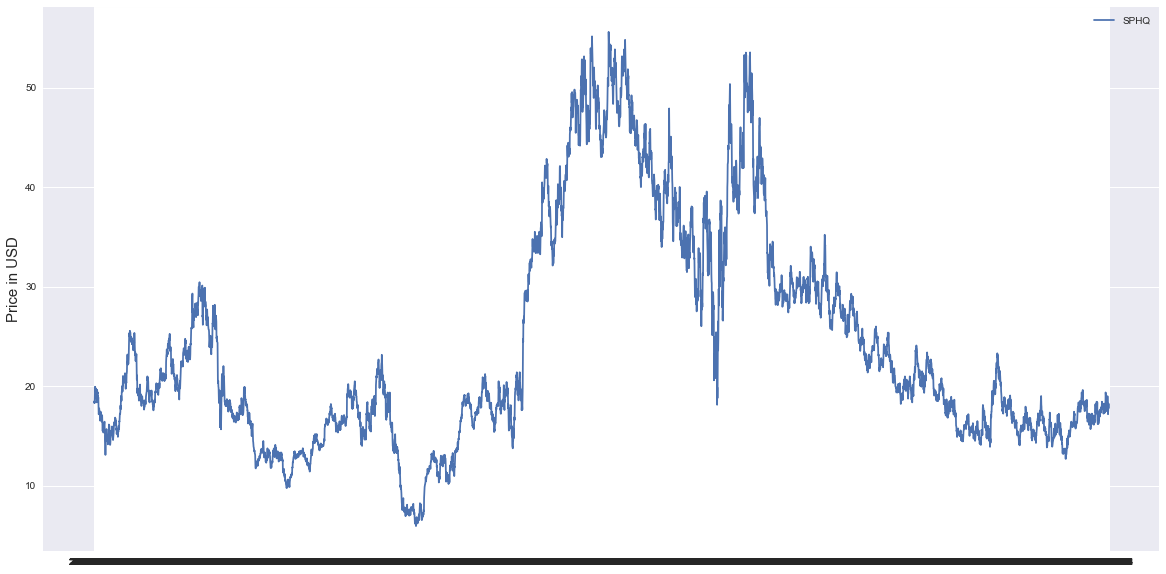

In [112]:
x3 = final_sphq_df.index
y3 = final_sphq_df["close"]
plt.figure(figsize=(20,10))
plt.plot(x3, y3, label='SPHQ')
plt.legend(loc='upper right')

plt.ylabel("Price in USD", fontsize=15)


plt.show()

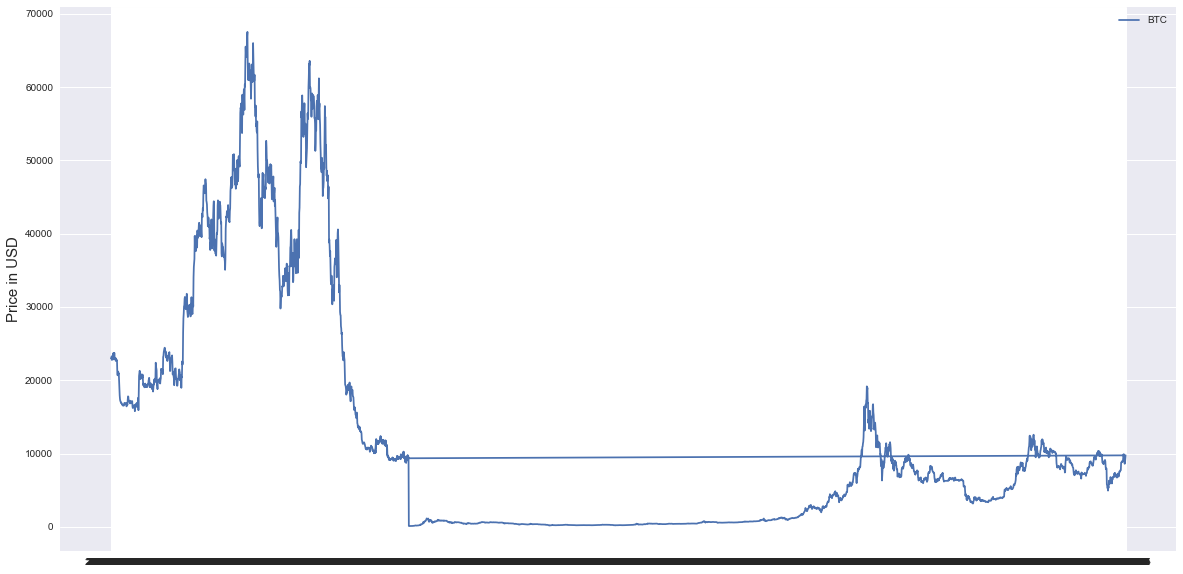

In [116]:
x4 = final_join_btc.index
y4 = final_join_btc["close"].astype(float)
plt.figure(figsize=(20,10))
plt.plot(x4, y4, label='BTC')
plt.legend(loc='upper right')

plt.ylabel("Price in USD", fontsize=15)


plt.show()

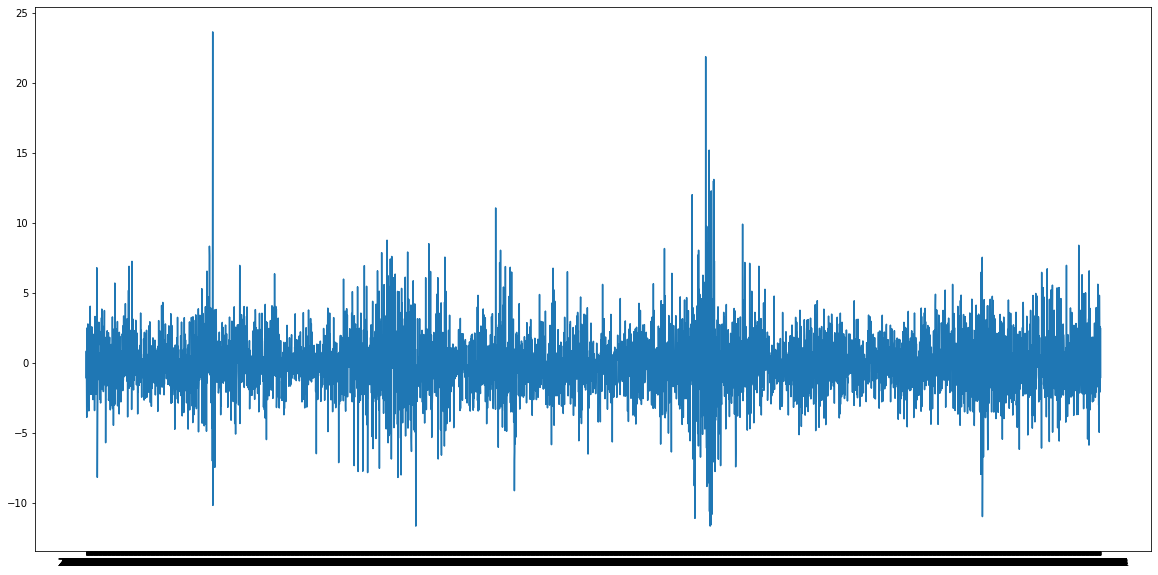

In [59]:
x2 = final_gold_df.index
y2 = final_gold_df["daily change (%)"]
plt.figure(figsize=(20,10))
plt.plot(x2, y2, label='GOLD')
plt.show()